# Dynamic Rupture using in 1D

### Mitchell Williams & Kenneth Duru

This notebook is a 1D dynamic rupture notebook that will be extended into 2D

## Description

### Background 

This notebook examines the dynamic rupture problem in 1D. Dynamic rupture models describe the process of how earthquakes nucleate. To approximate what happens in the real world this model uses 2 elastic solids that interact at a fault boundary via a frictional interface. To nucleate an earthquake a stress perturbation higher than the background stress is introduced. This high stress is relieved by slip and thus begins the rupture. The rupture front moves forward as the slip creates local higher stress as it moves outwards which is further released by slip. As the rupture front moves across the fault surface it interacts with the frictional forces acting on the fault surface.  <br/><br/>

--------------------------------------------------------------------
The governing equations behind this 2D problem can be divided by what happens within the elastic medium in both the left and right block, and what happens on the fault interface itself. Within the medium waves travel freely before interacting with the boundaries and fault. Their wave motion is described by the elastic wave equation. Forming this in velocity stress form with particle velocity ${v}$, shear stress ${\sigma }$, and density ${\rho}$: 
<br/><br/> ${\quad} {\rho} {\partial_t v} = {\partial_x \sigma \quad \quad \quad}  {\quad} \frac{1}{\mu}  {\partial_t \sigma} = {\partial_x v \quad}$  <br/> <br/>
<br/><br/>

-----------------------------------------------------------------

On the fault interface stress is continous which means that the tractions are equal and oppisite. Thus the total traction ${T}$ on the fault can be defined as positive on one side and negative on the other: ${\quad}{-T^- = T^+ = T}$ 

The last needed equation to consider is the relationship of velocities, the left side of the fault slips with a velocity of ${v^-}$, and the right side with a velocity of ${v^+}$. The slip velocity of the fault ${V}$ therefore is the difference of the particle velocity of the right side and left side: ${\quad V = v^+ - v^-}$ <br/><br/>

-------------------------------------------------------------


### Friction laws

It is necessary to consider the role of friction in all of this because it modulates the stresses and slip speed as the separate sides of the fault slip past each other. The first thing to consider is that as the fault slips it experiences shear strength ${\tau}$ which is exerted by the normal stresses on the fault ${\sigma_n}$. The way these two variables are related is through the friction coefficient ${f}$: ${\quad} {\tau} = f \cdot {\sigma_n}.{\quad} $ Using the fact that paritcle velocities are parallel to the shear stress ${ \frac {T}{|T|} = \frac {V}{|V|} \quad}$ and ${\tau = |T|}$

$ {T =  f \cdot {\sigma_n} \cdot \frac {\hat{V}}{|\hat{V}|} {\quad}{\quad}}$ 

The friction coefficient can have any number of representations that consider many different elements of a system. For the purposes of this model there are two different types of friction, *slip-weakening* and *rate and state*. <br/>

#### Slip Weakening Friction

Slip weakening friction describes a friction behavior in which friction is different when an interface is at a standstill and when the interface is slipping. When the fault is at a standstill the friction coeffecient is denoted by static friction coeffeicient ${f_s}$, when the fault is in motion the friction coefecient is denoted by the dynamic friction coefficient ${f_d}$. An earthquake begins while the fault is at a standstill when the background stress overcomes the fault strength. This moment represents the *Peak* shear stress on the fault ${\quad \sigma_p = f_s \cdot \sigma_n \quad}$ and as the earthquake continues the fault sides slide relative to each side and the frictional coefficient for the static situation evolves into the dynamic friction coefficient. As the earthquake continues for a long enough distance the friction coefficient evolves into the dynamic friction coefficient ${f_d}$, this situation is *Residual* strength of the fault while sliding ${\quad \sigma_r = f_d \cdot \sigma_n \quad}$ where ${\quad \sigma_p > \sigma_r . \quad}$ The fault needs to slip over a certain distance for the the static coefficient to fully decrease to the dynamic coefficient, this distance is called the critical distance and is denoted by ${D_c}$ and is often empirically found. When the fault has slid further than the critical distance the friction remains ${f_d}$. This notebook uses a linear function to describe the evolution of the static friction coefficient into the dynamic friction coefficeint. This can bee seen in the figure below which plots the friction coeffcient as a function of slip distance. The rupture then continues till the background stress is under the fault strength. In a stick slip model after the earthquake is over the fault regains the static friction coefficient and begins reaccumulating stress until it is once again higher than the fault strength and is released by slip. 

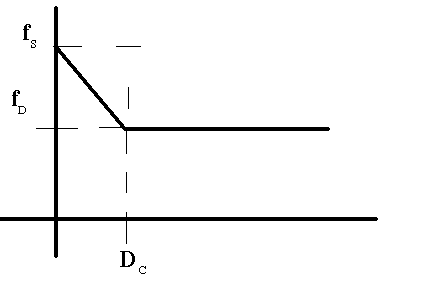


#### Rate and State Friction

Rate and state friction is a constitutive law that was empirically found and is considered more realistic than slip weakening. It takes the form:  

${ \sigma = \sigma_n \cdot [ f_0 + a \cdot ln(\frac {V}{V_0}) + b \cdot ln( \frac{V_0 \theta}{D_c})]}$ 

In this equation ${V}$ is the current slip velocity and ${V_0}$ is a reference slip velocity while ${f_0}$ is the steady state friction at the reference velocity: ${f_{V= V_0}}$. There is the state variable ${\theta}$, while it has many representations a generally accepted one is called the aging law and takes the form of ${ \frac {d \theta}{dt} = 1 - \frac {V\theta }{D_c}.\quad}$ At steady state the state variable is proportional to the critical distance divided by velocity ${ \theta_{ss} = \frac {D_c}{V}}$  <br/>

Here ${a}$ is the *direct effect* and is used to model how the system responds to velocity changes. ${b}$ is the *evolution effect* and describes the magnitude of the steady state friction.  ${D_c}$ is the critical distance and corresponds to the slip length over which the evolution of ${a \to b}$ occurs. The relationship of ${a}$ and ${b}$ to the slip weakening friction variables is as follows: ${\quad b = \frac {df_s}{d(ln(t))} \quad, \quad (a-b) = \frac {df_d}{d(ln(V))} \quad}$ where ${t}$ is the amount of time of contact without an earthquake. It is interesting to notice that there is a relationship between slip velocity ${V}$ and dynamic friction ${f_d}$ that depends on the difference ${(a-b)}$. If ${(a-b)>0}$ it shows that there is a velocity strengthening relationship ${\frac {df_d}{d(ln(V))} > 0}$. Any rupture that enters this region will arrest and is called a *stable* region. If ${(a-b)<0}$ it shows that there is a velocity weakening relationship ${\frac {df_d}{d(ln(V))} < 0}$, this is where earthquakes can nucleate and grow and is called *unstable*. On the border between *stable* and *unstable* regions is a zone of *conditional stability* where ruptures can sustain propagation while not growing or terminating. This notebook only exists in the unstable zone.





### Putting it together

In the parameter window you can modulate the material properties, run time, domain size, and CFL criterion. In addition, you can choose rate and state friction or slip weakening friction, notice the differences that occur with this choice. In the Calculations and plotting cell the resulting on fault tractions and slip velocities are solved for in the time_integrator.elastic_RK4 function, which also calls on the other associated functions. They solve the wave propagation problem by the Separation By Parts method (SBP) and handle boundaries with Simultaneous Approximation Terms (SAT). The bottom cell contains 5 output plots of the rupture behavior.  



#### References 
Byerlee, J. “Friction of Rocks.” Rock Friction and Earthquake Prediction, vol. 116, 1978, pp. 615–626., doi:10.1007/978-3-0348-7182-2_4. <br/>
Gustafsson, Bertil. High Order Difference Methods for Time Dependent PDE. Springer, 2008.<br/>
Leeman, John. “Modeling Rate and State Friction with Python.” SciPy 2016. Austin, USA.<br/>
Scholz, Christopher H. “Earthquakes and Friction Laws.” Nature, vol. 391, no. 6662, 1998, pp. 37–42., doi:10.1038/34097.

In [1]:
# Import necessary routines

import numpy as np
import matplotlib.pyplot as plt
import time_integrator
import rate
import utils
import timeit

plt.switch_backend("nbagg")           # plots within this notebook

In [2]:
# Parameter cell
# All user defined parameters can be entered in this window. 

tend = 2.0      # final time
cfl = 0.5   # CFL number

L = 15.0         # length of the domain (km)
nx = 601        # grid points in x       
cs = 3.464       # velocity (km/s) (can be an array)                                                                                                             
rho = 2.6702     # density [g/cm^3]

iplot = 5       # snapshot frequency
order = 6        # order of accuracy

fric_law = 'RS' # 'SW = slip weakening', 'RS' = rate and state  


In [3]:
# Initialization cell 
# Do not alter
# spacing and material parameters

ny = nx          # grid points in y                                                                                                                       
dx = L/(nx-1)    # grid increment in x
dy = dx         # grid increment in y

rho_l = rho     # density [g/cm^3]
mu_l = rho_l*cs**2   # shear modulus [GPa]
Zs_l = rho_l*cs      # shear impedance 

rho_r = rho     # density [g/cm^3]
mu_r = rho_r*cs**2   # shear modulus [GPa]
Zs_r = rho_r*cs      # shear impedance 

#Initialize the domains L R
y_l = np.zeros((nx, 1))
y_r = np.zeros((nx, 1))

# Initial particle velocity perturbation and discretize the domain L R 
for j in range(0, nx):
    y_l[j, :] = -L + j*dx                                             # discrete domain
    y_r[j, :] =  0 + j*dx                                             # discrete domain

# Time stepping parameters
t=0   # initial time
dt = (cfl/cs)*dx                  # Time step
nt = int(round(tend/dt))          # number of time steps

# Initialize: particle velocity (v); and shear stress (s); and returns L
v_l = np.zeros((nx,1))
s_l = np.zeros((nx,1))
U_l = np.zeros((nx,1))
V_l = np.zeros((nx,1))
U_t_l = np.zeros((nx,1))
V_t_l = np.zeros((nx,1))
U_x_l = np.zeros((nx,1))
V_x_l = np.zeros((nx,1))

# Initialize: particle velocity (v); and shear stress (s); and returns R
v_r = np.zeros((nx,1))
s_r = np.zeros((nx,1))
U_r = np.zeros((nx,1))
V_r = np.zeros((nx,1))
U_t_r = np.zeros((nx,1))
V_t_r = np.zeros((nx,1))
U_x_r = np.zeros((nx,1))
V_x_r = np.zeros((nx,1))

# Initialize slip parameters
slip = np.zeros((1, 1))
psi = np.zeros((1, 1))

# Initial particle velocity perturbation and discretize the domain
for j in range(0, nx):
    y_l[j, :] = -L + j*dx                                             # discrete domain
    y_r[j, :] =  0 + j*dx    
        
# Boundary condition reflection coefficients  L
r0_l = 1                            # r=0:absorbing, r=1:free-surface, r=-1: clamped 
r1_l = 1                            # r=0:absorbing, r=1:free-surface, r=-1: clamped
# penalty parameters L
tau_11_l = 1 
tau_12_l = 1
tau_21_l = 1 
tau_22_l = 1

# Boundary condition reflection coefficients  R
r0_r = 1                            # r=0:absorbing, r=1:free-surface, r=-1: clamped 
r1_r = 1                            # r=0:absorbing, r=1:free-surface, r=-1: clamped
# penalty parameters R
tau_11_r = 1 
tau_12_r = 1
tau_21_r = 1 
tau_22_r = 1


<IPython.core.display.Javascript object>


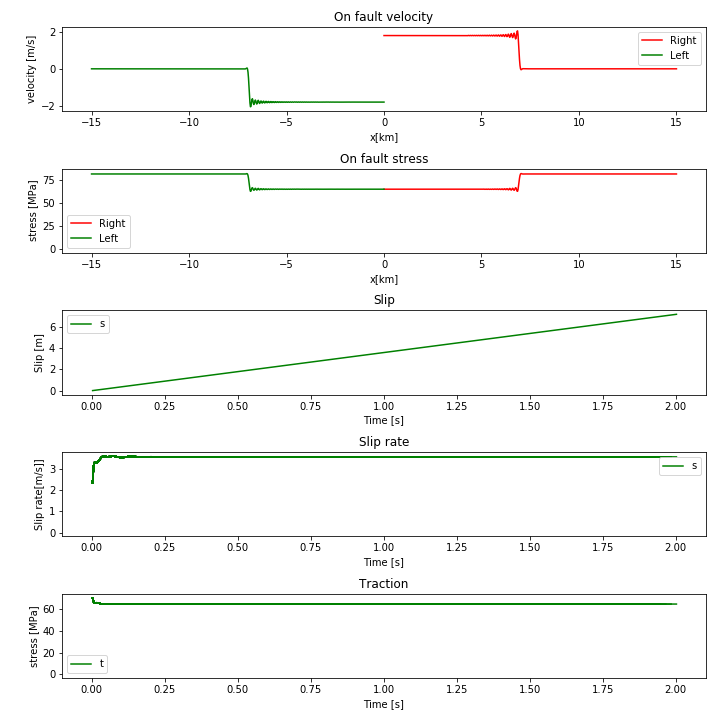

total simulation time =  130.9079076880007
spatial order  of accuracy =  6
number of grid points =  601


In [4]:
# Calculations and plottings for on fault slip velocity and stress

if fric_law not in ('SW', 'RS'):
    # Choose friction law: fric_law
    # We use linear (LN: T = alpha*v, alpha >=0)
    # Slip-weakening (SW)
    # Rate-and-state friction law (RS)
    
     print('friction law not implemented. choose fric_law = SW or fric_law = RS')
     exit(-1)
    
if fric_law  in ('SW'):
     alpha = 1e1000000                      # initial friction coefficient
     slip[:,:] = 0.0                        # initial slip (in m)
     Tau_0 = 81.24+1.0*0.36                 # initial load (81.24 in MPa), slight increase will unlock the fault
     alp_s = 0.677                          # stastic friction
     alp_d = 0.525                          # dynamic friction
     D_c = 0.4                              # critical slip
     sigma_n = 120.0                        # normal stress 
        
     # These are not needed for the slip weakening case   
     psi[:,:] = 0.0                         # initial condition for the state variable in friction law
     L0 = 1.0                               # state evolution distance
     f0 = 1.0                               # referance friction coeff
     a = 1.0                                # direct effect 
     b = 1.0                                # evolution parameter 
     V0 = 1.0                               # reference slip rate
    
if fric_law  in ('RS'):
     alpha = 1e1000000                      # initial friction coefficient                                                                                   
     slip[:,:] = 0.0                        # initial slip (in m)                                                                                                                             
     Tau_0 = 81.24+0.1*0.36                 # initial load (81.24 in MPa), slight increase will unlock the fault   
     psi[:,:] = 0.4367                      # initial condition for the state variable in friction law
     L0 = 0.02                              # state evolution distance
     f0 = 0.6                               # referance friction coeff
     a = 0.008                              # direct effect 
     b = 0.012                              # evolution parameter 
     V0 = 1.0e-6                            # reference slip rate
     sigma_n = 120.0                        # background normal stress 

     # These are not needed for the rate and state case   
     alp_s = 1.0                             # stastic friction
     alp_d = 1.0                             # dynamic friction
     D_c = 1.0                               # critical slip
    
friction_parameters = [fric_law, alpha, Tau_0, L0, f0, a, b, V0, sigma_n, alp_s, alp_d, D_c]    
#                        0         1      2     3   4  5  6   7    8       9      10    11    
# Initial variables    
Vd = [0]               # initial velocity
Sd = [Tau_0]           # background stress
T = [t]                # time
Slip = [0]    

# setting slip, slip rate, traction, and time vectors to empty sets
traction_vector = []
slip_vector = []
time_vector = []
sliprate_vector = []

# Initialize animated plot for velocity and stress
fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot(5,1,1)
line1 = ax1.plot(y_l, v_l, 'r', y_r, v_r, 'g')
plt.title('On fault velocity')
plt.xlabel('x[km]')
plt.ylabel('velocity [m/s]')

ax2 = fig1.add_subplot(5,1,2)
line2 = ax2.plot(y_l, s_l, 'r', y_r, s_r, 'g')
plt.title('On fault stress')
plt.xlabel('x[km]')
plt.ylabel('stress [MPa]')

ax3 = fig1.add_subplot(5,1,3)
line3 = ax3.plot(0,0,'g')
plt.title('Slip')
plt.xlabel('Time [s]')
plt.ylabel('Slip [m]')

ax4 = fig1.add_subplot(5,1,4)
line4 = ax4.plot(0,0,'g')
plt.title('Slip rate')
plt.xlabel('Time [s]')
plt.ylabel('Slip rate[m/s]]')

ax5 = fig1.add_subplot(5,1,5)
line5 = ax5.plot(0,0,'g')
plt.title('Traction')
plt.xlabel('Time [s]')
plt.ylabel('stress [MPa]')

plt.tight_layout()
plt.ion()
plt.show()

# Loop through time and evolve the wave-fields using ADER time-stepping scheme of N+1 order of accuracy
start = timeit.default_timer()

n = 0                             # counter
for t in utils.drange (0.0, tend+dt,dt):
    n = n+1
    
    # compute numerical solution 
    time_integrator.elastic_RK4(v_l, s_l, v_l, s_l, rho_l, mu_l, nx, dx, order, y_l, t, dt, r0_l, r1_l,  tau_11_l,\
                    tau_21_l, tau_12_l, tau_22_l,v_r, s_r, v_r, s_r, rho_r, mu_r, nx, dx, order,\
                                y_r, t, dt, r0_r, r1_r,  tau_11_r, tau_21_r, tau_12_r, tau_22_r,\
                               slip, psi, slip, psi,friction_parameters)
    
    # appending slip, slip rate, traction, and time vector through each time step.
    traction_vector.append(Tau_0+s_l[-1,0])
    slip_vector.append(slip[0,0])
    time_vector.append(n*dt)
    sliprate_vector.append(np.abs(v_r[0,0]-v_l[-1,0]))
    
    # Updating plots
    if n % iplot == 0: 
        for l in line1:
            l.remove()
            del l               
        for l in line2:
            l.remove()
            del l
        for l in line3:
            l.remove()
            del l

        # Display lines
        line1 = ax1.plot(y_r, v_r, 'r',y_l, v_l, 'g')
        ax1.legend(iter(line1),('Right', 'Left'))
        line2 = ax2.plot(y_r, s_r+Tau_0, 'r',y_l, s_l+Tau_0, 'g')
        ax2.legend(iter(line2),('Right', 'Left'))
        line3 = ax3.plot(time_vector,slip_vector,'g')
        ax3.legend(iter(line3),('slip'))
        line4 = ax4.plot(time_vector,sliprate_vector,'g')
        ax4.legend(iter(line4),('slip rate'))
        line5 = ax5.plot(time_vector,traction_vector,'g')
        ax5.legend(iter(line5),('traction'))
        plt.gcf().canvas.draw()
                   
    
plt.ioff()
plt.show()
# Simulation end time
stop = timeit.default_timer()
print('total simulation time = ', stop - start)                   # print the time required for simulation
print('spatial order  of accuracy = ', order)                     # print the polynomial degree used
print('number of grid points = ', nx)                             # print the degree of freedom